# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## **Цель и этапы исследования**

В данном проекте мы проанализурем исторические данные о поведении клиентов «Бета-Банка».

**Цель проекта:** создать модель, прогнозирующую возможный уход клиента из банка.

В качестве метрики будем использовть F1-меру со значением не менее 0.59 на тестовой выборке.

Дополнительно будем измерять AUC-ROC.

**Ход исследования:**

Исследование пройдёт в четыре этапа:
1. Подготовка данных
2. Исследование задачи
3. Борьба с дисбалансом классов
4. Тестирование модели

## Подготовка данных

### Открытие и изучение файла

In [85]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, roc_auc_score
import warnings; warnings.filterwarnings('ignore')

In [2]:
# Открываем файл
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
# Изучаем информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [5]:
# Проверяем, есть ли в данных пропущенные значения
df.isna().sum().sort_values()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Tenure             909
dtype: int64

In [6]:
# Посмотрим, есть ли дубликаты
df.duplicated().sum()

0

**Вывод:**

В датасете 10000 строк и 14 столбцов. Три столбца имеют тип данных `float64`, восемь - тип данных `int64` и три столбца - тип `object`.

В столбце `Tenure` обнаружено 909 пропущенных значений, что составляет менее 10% от общего числа.

В столбце `Exited` цифрой 1 обозначены ушедшие клиенты банка, цифрой 0 - оставшиеся клиенты. Этот столбец будет целевым признаком для модели.

Данные этого столбца относятся к категориальным, значит будет решатся задача классификации, а именно бинарной (двоичной) классификации.

### Предобработка данных

In [7]:
# Переименуем столбцы в соответствии со snake_case:
df.columns = df.columns.str.lower() # приводим названия столбцов к нижнему регистру
df = df.rename(columns={'rownumber': 'row_number',
                                'customerid': 'customer_id',
                                'creditscore': 'credit_score',
                                'numofproducts': 'num_of_products',
                                'hascrcard': 'has_cr_card',
                                'isactivemember': 'is_active_member',
                                'estimatedsalary': 'estimated_salary' })

In [8]:
# Удалиляем строки с пропусками в столбце 'tenure':
df = df[~df['tenure'].isna()]

In [9]:
df.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        9091 non-null   int64  
 1   customer_id       9091 non-null   int64  
 2   surname           9091 non-null   object 
 3   credit_score      9091 non-null   int64  
 4   geography         9091 non-null   object 
 5   gender            9091 non-null   object 
 6   age               9091 non-null   int64  
 7   tenure            9091 non-null   float64
 8   balance           9091 non-null   float64
 9   num_of_products   9091 non-null   int64  
 10  has_cr_card       9091 non-null   int64  
 11  is_active_member  9091 non-null   int64  
 12  estimated_salary  9091 non-null   float64
 13  exited            9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        9091 non-null   int64  
 1   customer_id       9091 non-null   int64  
 2   surname           9091 non-null   object 
 3   credit_score      9091 non-null   int64  
 4   geography         9091 non-null   object 
 5   gender            9091 non-null   object 
 6   age               9091 non-null   int64  
 7   tenure            9091 non-null   float64
 8   balance           9091 non-null   float64
 9   num_of_products   9091 non-null   int64  
 10  has_cr_card       9091 non-null   int64  
 11  is_active_member  9091 non-null   int64  
 12  estimated_salary  9091 non-null   float64
 13  exited            9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


Мы переименовали столбцы датасета в соответствии со snake_case. 

Удалили строки с пропусками в столбце `tenure`.

### Подготовка  признаков

In [12]:
# удаляем признаки с номерами строк, индентификаторами и фамилиями клиентов, 
# чтобы не допустить переобучения моделей 
df = df.drop(['row_number','customer_id','surname'], axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9091 non-null   int64  
 1   geography         9091 non-null   object 
 2   gender            9091 non-null   object 
 3   age               9091 non-null   int64  
 4   tenure            9091 non-null   float64
 5   balance           9091 non-null   float64
 6   num_of_products   9091 non-null   int64  
 7   has_cr_card       9091 non-null   int64  
 8   is_active_member  9091 non-null   int64  
 9   estimated_salary  9091 non-null   float64
 10  exited            9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 852.3+ KB


#### Разделение данных на выборки

In [14]:
df_target = df['exited'] # создаем переменную с признаками
df_features = df.drop('exited', axis = 1) # и с целевым признаком

In [15]:
# Выделем 20% данных для тестовой выборки
features, features_test, target, target_test =\
train_test_split(df_features, df_target,
                 test_size = 0.2,
                 stratify = df_target,
                 random_state = 12345)

In [16]:
# Оставшиеся данные делим на тренировочную и валидационную выборки
features_train, features_valid, target_train, target_valid =\
train_test_split(features, target,
                 test_size = 0.25,
                 stratify = target,
                 random_state = 12345)

In [17]:
features_train.shape

(5454, 10)

In [18]:
features_valid.shape

(1818, 10)

In [19]:
features_test.shape

(1819, 10)

#### Кодирование категориальных признаков

In [20]:
# Закодируем категориальные данные с помощью OneHotEncoder:
cat_columns = ['geography','gender']
transformer = make_column_transformer(
              (OneHotEncoder(drop='first'), cat_columns),
              remainder = 'passthrough')
transformer.fit(features_train)

features_train = pd.DataFrame(transformer.transform(features_train),
                             columns = transformer.get_feature_names())
features_valid = pd.DataFrame(transformer.transform(features_valid),
                              columns = transformer.get_feature_names())
features_test = pd.DataFrame(transformer.transform(features_test),
                             columns = transformer.get_feature_names())

In [21]:
features_train.head()

,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Male,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
0,0.0,0.0,0.0,678.0,28.0,4.0,0.00,2.0,1.0,1.0,144423.17
1,0.0,0.0,1.0,735.0,41.0,7.0,179904.00,1.0,1.0,1.0,137180.95
2,0.0,0.0,0.0,639.0,31.0,3.0,98360.03,1.0,0.0,0.0,20973.80
3,0.0,0.0,1.0,521.0,38.0,5.0,110641.18,1.0,0.0,1.0,136507.69
4,0.0,0.0,1.0,735.0,50.0,2.0,0.00,2.0,0.0,1.0,147075.69


In [22]:
features_valid.head()

,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Male,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
0,1.0,0.0,0.0,619.0,41.0,5.0,92467.58,1.0,1.0,0.0,38270.47
1,0.0,0.0,1.0,668.0,72.0,2.0,0.00,2.0,1.0,1.0,70783.61
2,0.0,0.0,1.0,532.0,60.0,5.0,76705.87,2.0,0.0,1.0,13889.73
3,0.0,0.0,1.0,625.0,43.0,8.0,201696.07,1.0,1.0,0.0,133020.90
4,0.0,0.0,0.0,516.0,47.0,6.0,109387.33,1.0,0.0,0.0,121365.45


In [23]:
features_test.head()

,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Male,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
0,1.0,0.0,1.0,480.0,44.0,10.0,129608.57,1.0,1.0,0.0,5472.70
1,0.0,0.0,1.0,762.0,31.0,7.0,117687.35,1.0,1.0,1.0,159344.43
2,1.0,0.0,0.0,466.0,56.0,2.0,111920.13,3.0,1.0,0.0,197634.11
3,0.0,0.0,1.0,559.0,28.0,3.0,141099.43,1.0,1.0,1.0,15607.27
4,1.0,0.0,1.0,728.0,39.0,6.0,152182.83,1.0,0.0,0.0,161203.60


#### Масштабирование численных признаков

In [24]:
# масштабируем численные признаки с помощью StandardScaler
numeric = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

# стандартизируем выборку не разделенную на обучающую и валидационную 
# для использования в кросс-валидации
features[numeric] = scaler.fit_transform(features[numeric])

pd.options.mode.chained_assignment = None

Мы удалили столбцы с признаками, которые не влияют на целевой: `row_number`,`customer_id`,`surname`.

Разделили данные на обучающую, валидационную и тестовую выборки в соотношении 60:20:20.

Закодировали категориальные признаки с помощью `One-Hot Encoder`.

Стандартизировали численные признаки с помощью `StandardScaler`.

## Исследование задачи

Обучим модели без учёта дисбаланса классов.

### Модель решающего дерева

In [25]:
# Инициализируем модель решающего дерева, обучаем её на тренировочной выборке, 
# перебирая разные значения гиперпараметров: максимальной глубины, 
# минимального количество примеров для разделения, критериев 
# проверяем качество на валидационной выборке, выбираем лучшую модель по метрике F1-мера
%time

tree_records = []
best_tree_model = None
best_tree_result = 0
best_tree_depth = 0
best_tree_split = 0
best_tree_criterion = None

for depth in range(1, 10):
    for split in range(2, 10):
        for criterion in ['gini', 'entropy']:
            tree_model = DecisionTreeClassifier(random_state = 12345,
                                                max_depth = depth,
                                                min_samples_split = split,
                                                criterion = criterion)
            tree_model.fit(features_train, target_train)
            tree_predictions = tree_model.predict(features_valid)
            tree_result = f1_score(target_valid, tree_predictions)
            record = {'max_depth':depth,
                  'min_samples_split': split,
                  'criterion': criterion,
                  'f1_score': tree_result}
            tree_records.append(record)
            
            if tree_result > best_tree_result:
                best_tree_model = tree_model
                best_tree_result = tree_result
                best_tree_depth = depth
                best_tree_split = split
                best_tree_criterion = criterion
models =[]                
models.append({'tree_model': best_tree_result})                

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


In [26]:
# Максимальная глубина дерева в лучшей модели
best_tree_depth

7

In [27]:
# Минимальное количество примеров для разделения в лучшей модели
best_tree_split

2

In [28]:
# Критерий лучшей модели
best_tree_criterion

'gini'

In [29]:
# Посмотрим на результат лучшей модели
best_tree_result

0.5605306799336649

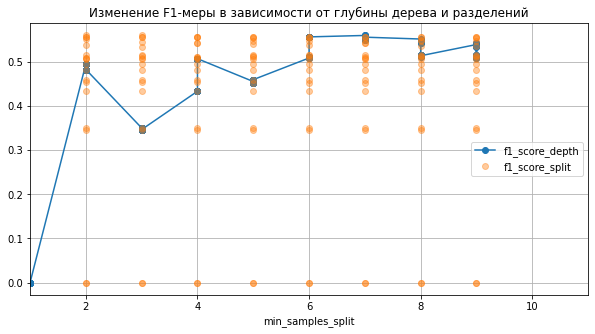

In [30]:
# Построим график зависимости F1-меры от глубины дерева и количества примеров для разделения
tree_table = pd.DataFrame(tree_records)
ax = tree_table.plot(x = 'max_depth',
                     y = 'f1_score',
                     xlim = (1, 11),
                     style = 'o-',
                     grid = True,
                     figsize = (10,5),
                     label = 'f1_score_depth',
                     title = 'Изменение F1-меры в зависимости от глубины дерева и разделений');

tree_table.plot(x = 'min_samples_split',
                y = 'f1_score',
                style = 'o',
                alpha = 0.4,
                grid = True,
                label = 'f1_score_split',
                ax = ax);

In [31]:
# Измерим значение метрики `AUC_ROC`
tree_prob = best_tree_model.predict_proba(features_valid)
tree_prob_one = tree_prob[:,1]
tree_auc_roc = roc_auc_score(target_valid, tree_prob_one)

In [32]:
tree_auc_roc

0.8298179894455859

Таким образом, мы получили модель решающего дерева со значениям `max_depth` **7** и значениями `min_samples_split` и `criterion` равными значениям по умолчанию. 

А значение метрики `F1-мера` составляет **0.56**, что ниже установленного критерия успешной модели в 0.59. 

Значение метрики `AUC_ROC` - **0.829**

### Модель случайного леса

In [33]:
# Инициализируем модель случайного леса.  
# Переберём гиперпараметры максимальной глубины, 
# минимального количества разделений и количества деревьев
# обучая модель на тренировочной выборке, 
# Проверим качество на валидационной выборке, выбирем лучшую модель 
%time

forest_records = []
best_for_model = None
best_for_result = 0
best_for_depth = 0
best_for_split = 0
best_est = 0 

for depth in range(1, 15):
    for split in range(2, 15):
        for est in range(30, 300, 10):
            for_model = RandomForestClassifier(random_state = 12345,
                                               max_depth = depth,
                                               min_samples_split = split,
                                               n_estimators = est)
            for_model.fit(features_train, target_train)
            for_predictions = for_model.predict(features_valid)
            for_result = f1_score(target_valid, for_predictions)
            record = {'max_depth': depth,
                      'min_samples_split': split,
                      'n_estimators': est,
                      'f1_score': for_result}
            forest_records.append(record)
            
            if for_result > best_for_result:
                best_for_model = for_model
                best_for_result = for_result
                best_for_depth = depth
                best_for_split = split
                best_est = est 
            
models.append({'forest_model': best_for_result})

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [34]:
best_for_depth

12

In [35]:
best_for_split

3

In [36]:
best_est

40

In [37]:
best_for_result

0.5932203389830509

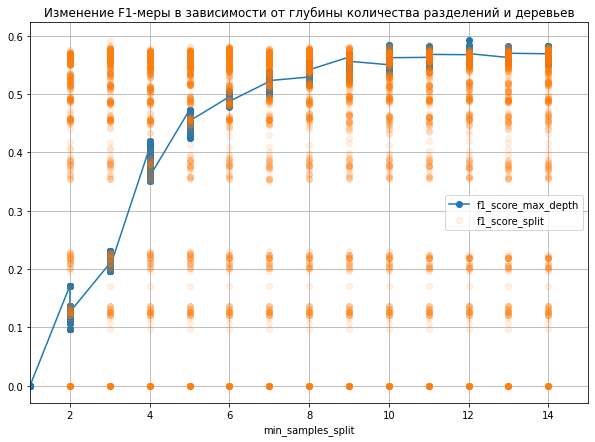

In [38]:
# Построим график зависимости F1-меры от глубины и разделений:
forest_table = pd.DataFrame(forest_records)
ax = forest_table.plot(x = 'max_depth',
                       y = 'f1_score',
                       style = 'o-',
                       xlim = (1, 15),
                       grid = True,
                       figsize = (10,7),
                       label = 'f1_score_max_depth',
                       title = 'Изменение F1-меры в зависимости от глубины количества разделений и деревьев');

forest_table.plot(x = 'min_samples_split',
                  y = 'f1_score',
                  xlim = (1, 15),
                  style = 'o',
                  alpha = 0.1,
                  grid = True,
                  label ='f1_score_split',
                  ax = ax);

In [39]:
# Измерим значение метрики `AUC_ROC`
for_prob = best_for_model.predict_proba(features_valid)
for_prob_one = for_prob[:,1]
for_auc_roc = roc_auc_score(target_valid, for_prob_one)

In [40]:
for_auc_roc

0.8543952819943483

Модель случайного леса со значением `max_depth` - **12**, `min_samples_split` - **8** и количеством деревьев **30** показала `F1-меру`  **0.59** , что уже соответствует установленному критерию. 

Значение `AUC_ROC` составило **0.855**.

### Модель логистической регрессии

In [41]:
# Инициализируем модель логистической регрессии, 
# настроим гиперпараметры 'max_iter' и 'C',
# обучим модель обучающей выборке
%time

best_log_model = None
best_log_result = 0
best_it = 0
best_c = 0

for it in range(100, 500, 10):
    for c in np.arange(1.0, 5.0):
        log_model = LogisticRegression(random_state = 12345,
                                       solver='liblinear',
                                       max_iter = it,
                                       C = c)
        log_model.fit(features_train, target_train)
        log_predictions = log_model.predict(features_valid)
        log_result = f1_score(target_valid, log_predictions)
        
        if log_result > best_log_result:
            best_log_model = log_model
            best_log_result = log_result
            best_it = it
            best_c = c
                           
models.append({'log_model': best_log_result})              

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [42]:
best_it

100

In [43]:
best_c

1.0

In [44]:
best_log_result

0.2828282828282828

In [45]:
# Измерим значение метрики `AUC_ROC`
log_prob = best_log_model.predict_proba(features_valid)
log_prob_one = log_prob[:,1]
log_auc_roc = roc_auc_score(target_valid, log_prob_one)

In [46]:
log_auc_roc

0.7578240695034061

Логистическая регрессия показала худший результат по `F1-мере` всего **0.28**, `AUC_ROC`  - **0.758**.

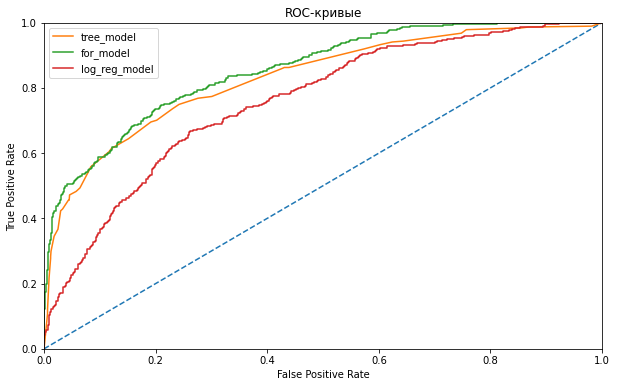

In [47]:
# Построим график ROC-кривых трех моделей
plt.figure(figsize=(10, 6)) 
plt.title('ROC-кривые')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

probabilities = [tree_prob_one, for_prob_one, log_prob_one]
labels = ['tree_model', 'for_model', 'log_reg_model']
for i in range(len(probabilities)):
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities[i])
    plt.plot(fpr, tpr, label = labels[i])
    plt.legend()

plt.show()

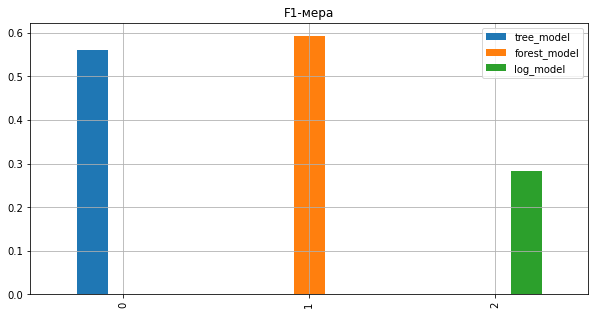

In [48]:
# Построим график значений F1-меры у трех моделей
pd.DataFrame(models).plot(kind = 'bar',
                          grid = True,
                          figsize = (10,5),
                          title='F1-мера');

**Вывод**

Лучший результат по значению метрики `F1-мера` на валидационной выборке - **0.59** - показала модель случайный лес. Он уже соотвествует установленному критерию успешной модели. Но на тестовой выборке может снизиться. Возможно его можно повысить, если устранить дисбаланс классов.

## Борьба с дисбалансом

### Исследование баланса классов

In [49]:
# Посмотрим на соотношение классов в целевом признаке 
target_train.value_counts(normalize = True)

0    0.796113
1    0.203887
Name: exited, dtype: float64

Отрицательных объектов почти в четыре раза больше, чем положительных.

### Взвешивание классов

Добавим аргумент `class_weight = 'balanced'` в три получившиеся модели с лучшими гиперпараметрами.

#### Модель решающего дерева

In [50]:
# Добавим в модель решающего дерева параметр class_weight = 'balanced' 
# и снова переберём гиперпараметры
%time

best_tree_model_balanced = None
best_tree_result_balanced = 0
best_tree_depth_balanced = 0
best_tree_split_balanced = 0
best_tree_criterion_balanced = None

for depth in range(1, 10):
    for split in range(2, 10):
        for criterion in ['gini', 'entropy']:
            tree_model_balanced = DecisionTreeClassifier(random_state = 12345,
                                            max_depth = depth,
                                            min_samples_split = split,
                                            criterion = criterion,
                                            class_weight = 'balanced')
            tree_model_balanced.fit(features_train, target_train)
            tree_predictions_balanced = tree_model_balanced.predict(features_valid)
            tree_result_balanced = f1_score(target_valid, tree_predictions_balanced)
            
            if tree_result_balanced > best_tree_result_balanced:
                best_tree_model_balanced = tree_model_balanced
                best_tree_result_balanced = tree_result_balanced
                best_tree_depth_balanced = depth
                best_tree_split_balanced = split
                best_tree_criterion_balanced = criterion

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [51]:
best_tree_depth_balanced

8

In [52]:
best_tree_split_balanced

8

In [53]:
best_tree_criterion_balanced

'gini'

In [54]:
best_tree_result_balanced

0.5720122574055159

In [55]:
tree_prob_balanced = best_tree_model_balanced.predict_proba(features_valid)
tree_prob_balanced_one = tree_prob_balanced[:,1]
tree_balanced_auc_roc = roc_auc_score(target_valid, tree_prob_balanced_one)

In [56]:
tree_balanced_auc_roc

0.8029327337720762

Взвешивание классов улучшило значение `F1-меры` решающего дерева с **0.56** до **0.57**, а значение метрики `AUC_ROC` снизилась с **0.829** до **0.8**.

#### Модель случайного леса

In [57]:
# Добавим параметр class_weight = 'balanced' в случайный лес
# и снова переберём гиперпараметры

%time

best_for_model_balanced = None
best_for_result_balanced = 0
best_for_depth_balanced = 0
best_for_split_balanced = 0
best_est_balanced = 0 

for depth in range(1, 15):
    for split in range(2, 15):
        for est in range(30, 300, 10):
            for_model_balanced = RandomForestClassifier(random_state = 12345,
                                               max_depth = depth,
                                               min_samples_split = split,
                                               n_estimators = est,
                                               class_weight = 'balanced')
            for_model_balanced.fit(features_train, target_train)
            for_predictions_balanced = for_model_balanced.predict(features_valid)
            for_result_balanced = f1_score(target_valid, for_predictions_balanced)
            
            if for_result_balanced > best_for_result_balanced:
                best_for_model_balanced = for_model_balanced
                best_for_result_balanced = for_result_balanced
                best_for_depth_balanced = depth
                best_for_split_balanced = split
                best_est_balanced = est 

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [58]:
best_for_depth_balanced

12

In [59]:
best_for_split_balanced

7

In [60]:
best_est_balanced

50

In [61]:
best_for_result_balanced

0.6210826210826211

In [62]:
for_prob_balanced = best_for_model_balanced.predict_proba(features_valid)
for_prob_balanced_one = for_prob_balanced[:,1]
for_balanced_auc_roc = roc_auc_score(target_valid, for_prob_balanced_one)

In [63]:
for_balanced_auc_roc

0.8643834161952324

Сбалансированный вес классов в случайном лесе с `max_depth` - 9, `min_samples_split` - 11 и количеством деревьев 40 увеличил `f1_score` на валидационной выборке до **0.628**, что выше необходимого минимума в 0.59. `AUC_ROC` выросла с **0.855** до **0.860**.

#### Модель логистической регрессии

In [64]:
# Добавим параметр class_weight = 'balanced' в модель логистической регрессии 
# настроим гиперпараметры 
# Инициализируем модель логистической регрессии, 
# настроим гиперпараметры 'max_iter' и 'C',
# обучим модель обучающей выборке
%time

best_log_model_balanced = None
best_log_result_balanced = 0
best_it_balanced = 0
best_c_balanced = 0

for it in range(100, 500, 10):
    for c in np.arange(1.0, 5.0):
        log_model_balanced = LogisticRegression(random_state = 12345,
                                                solver='liblinear',
                                                max_iter = it,
                                                C = c,
                                                class_weight = 'balanced')
        log_model_balanced.fit(features_train, target_train)
        log_predictions_balanced = log_model_balanced.predict(features_valid)
        log_result_balanced = f1_score(target_valid, log_predictions_balanced)
        
        if log_result_balanced > best_log_result_balanced:
            best_log_model_balanced = log_model_balanced
            best_log_result_balanced = log_result_balanced
            best_it_balanced = it
            best_c_balanced = c   

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [65]:
best_log_result_balanced

0.4956937799043062

In [66]:
log_prob_balanced = log_model_balanced.predict_proba(features_valid)
log_prob_balanced_one = log_prob_balanced[:,1]
log_balanced_auc_roc = roc_auc_score(target_valid, log_prob_balanced_one)

In [67]:
log_balanced_auc_roc

0.7613111614884965

В логистической регрессии `F1-мера` также значительно выросла после балансировки веса классов, но она все равно осталась самой низкой - всего **0.496**. А `AUC_ROC` повысилась до **0.76**.

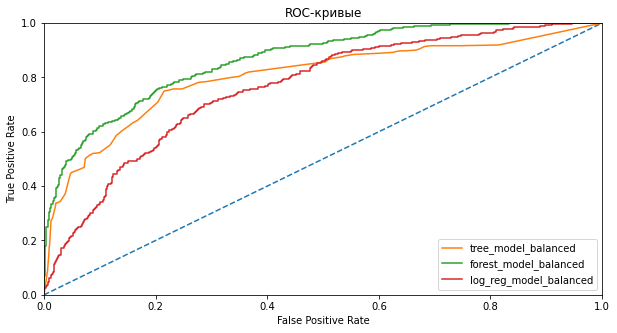

In [68]:
# Построим график ROC-кривых трех сбаласированных моделей
plt.figure(figsize=(10, 5)) 
plt.title('ROC-кривые')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

probabilities = [tree_prob_balanced_one, for_prob_balanced_one, log_prob_balanced_one]
labels = ['tree_model_balanced', 'forest_model_balanced', 'log_reg_model_balanced']
for i in range(len(probabilities)):
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities[i])
    plt.plot(fpr, tpr, label = labels[i])
    plt.legend()

plt.show()

In [69]:
# Построим таблицу старых и новых значений F1-меры трех сбалансированных моделей
models_balanced =\
pd.DataFrame(index = ['tree_model', 'forest_model', 'log_reg_model'],
             data = [[best_tree_result, best_tree_result_balanced],
                    [best_for_result, best_for_result_balanced],
                    [best_log_result, best_log_result_balanced]],
             columns = ['unbalanced', 'balanced'])

In [70]:
models_balanced

,unbalanced,balanced
tree_model,0.560531,0.572012
forest_model,0.593220,0.621083
log_reg_model,0.282828,0.495694


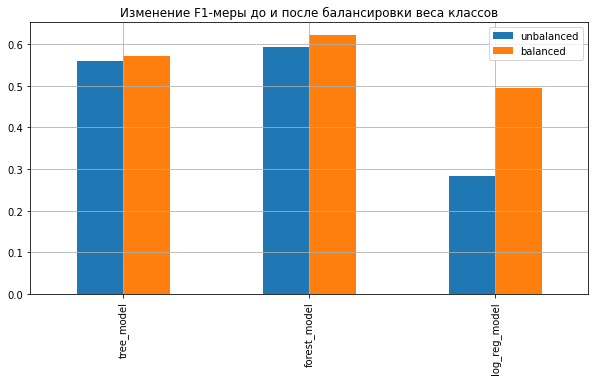

In [71]:
# Построим график старых и новых значений F1-меры трех сбалансированных моделей
pd.DataFrame(models_balanced).plot(kind = 'bar',
                          grid = True,
                          figsize = (10,5),
                          title='Изменение F1-меры до и после балансировки веса классов');

**Вывод:**

Взвешивание классов с помощью аргумента `class_weight = 'balanced'` существенно повысило качество всех моделей по метрике `F1-мера`.
По результатам взвешивания классов лидером стала модель случайного леса со значением `F1-меры` на валидационной выборке **0.628**, что выше установленного критерия успешной модели.

### Увеличение выборки

In [104]:
# Увеличим количество объектов нулевого класса техникой upsampling
def upsample(features, target, repeat):
    features_zeros = features[target.values == 0]
    features_ones = features[target.values == 1]
    target_zeros = target[target.values == 0]
    target_ones = target[target.values == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state = 12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [105]:
# Посмотрим на новое соотношение классов в целевом признаке 
target_upsampled.value_counts(normalize = True)

1    0.50603
0    0.49397
Name: exited, dtype: float64

Обучим модели на новых данных

#### Модель решающего дерева

In [106]:
%time

best_tree_model_upsampled = None
best_tree_result_upsampled = 0
best_tree_depth_upsampled = 0
best_tree_split_upsampled = 0
best_tree_criterion_upsampled = None

for depth in range(1, 10):
    for split in range(2, 10):
        for criterion in ['gini', 'entropy']:
            tree_model_upsampled = DecisionTreeClassifier(random_state = 12345,
                                            max_depth = depth,
                                            min_samples_split = split,
                                            criterion = criterion)
            tree_model_upsampled.fit(features_upsampled, target_upsampled)
            tree_predictions_upsampled = tree_model_upsampled.predict(features_valid)
            tree_result_upsampled = f1_score(target_valid, tree_predictions_upsampled)
            
            if tree_result_upsampled > best_tree_result_upsampled:
                best_tree_model_upsampled = tree_model_upsampled
                best_tree_result_upsampled = tree_result_upsampled
                best_tree_depth_upsampled = depth
                best_tree_split_upsampled = split
                best_tree_criterion_upsampled = criterion

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.68 µs


In [107]:
best_tree_result_upsampled

0.5705521472392638

In [108]:
tree_prob_upsampled = best_tree_model_upsampled.predict_proba(features_valid)
tree_prob_upsampled_one = tree_prob_upsampled[:,1]
tree_upsampled_auc_roc = roc_auc_score(target_valid, tree_prob_upsampled_one)

In [109]:
tree_upsampled_auc_roc

0.7997734880419941

Увеличение выборки техникой `upsampling` лишь немного улучшило качество решающего дерева по сравнению с моделью с дисбалансом классов  с **0.56** до **0.569** по метрике `F1-мера`, но  ухудшило по сравнению с взевшиванием классов, где `F1-мера` была **0.57**. `AUC_ROC` еще больше упала до **0.799**.

#### Модель случайного леса

In [110]:
%time

best_for_model_upsampled = None
best_for_result_upsampled = 0
best_for_depth_upsampled = 0
best_for_split_upsampled = 0
best_est_upsampled = 0 

for depth in range(1, 15):
    for split in range(2, 15):
        for est in range(30, 300, 10):
            for_model_upsampled = RandomForestClassifier(random_state = 12345,
                                                         max_depth = depth,
                                                         min_samples_split = split,
                                                         n_estimators = est)
            for_model_upsampled.fit(features_upsampled, target_upsampled)
            for_predictions_upsampled = for_model_upsampled.predict(features_valid)
            for_result_upsampled = f1_score(target_valid, for_predictions_upsampled)
            
            if for_result_upsampled > best_for_result_upsampled:
                best_for_model_upsampled = for_model_upsampled
                best_for_result_upsampled = for_result_upsampled
                best_for_depth_upsampled = depth
                best_for_split_upsampled = split
                best_est_upsampled = est 

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


In [111]:
best_for_depth_upsampled

11

In [112]:
best_for_split_upsampled

14

In [113]:
best_est_upsampled

30

In [114]:
best_for_result_upsampled

0.6286407766990291

In [115]:
for_prob_upsampled = best_for_model_upsampled.predict_proba(features_valid)
for_prob_upsampled_one = for_prob_upsampled[:,1]
for_upsampled_auc_roc = roc_auc_score(target_valid, for_prob_upsampled_one)

In [116]:
for_upsampled_auc_roc

0.8706069067519564

Для случайного леса увеличение выборки техникой `upsampling` повысило результат по метрике `F1-мера` по сравнению с несбаласированной моделью, но он не превзошел результат модели с сбаласированными классами. А вот `AUC_ROC` еще больше выросла до **0.867**.

#### Модель логистической регрессии

In [117]:
%time

best_log_model_upsampled = None
best_log_result_upsampled = 0
best_it_upsampled = 0
best_c_upsampled = 0

for it in range(100, 500, 10):
    for c in np.arange(1.0, 5.0):
        log_model_upsampled = LogisticRegression(random_state = 12345,
                                                 solver='liblinear',
                                                 max_iter = it,
                                                 C = c)
        log_model_upsampled.fit(features_upsampled, target_upsampled)
        log_predictions_upsampled = log_model_upsampled.predict(features_valid)
        log_result_upsampled = f1_score(target_valid, log_predictions_upsampled)
        
        if log_result_upsampled > best_log_result_upsampled:
            best_log_model_upsampled = log_model_upsampled
            best_log_result_upsampled = log_result_upsampled
            best_it_upsampled = it
            best_c_upsampled = c

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


In [118]:
best_log_result_upsampled

0.4938737040527804

In [119]:
log_prob_upsampled = log_model_upsampled.predict_proba(features_valid)
log_prob_upsampled_one = log_prob_upsampled[:,1]
log_upsampled_auc_roc = roc_auc_score(target_valid, log_prob_upsampled_one)

In [120]:
log_upsampled_auc_roc

0.7613279263538094

Результаты логистической регрессии также оказались чуть хуже после увеличения выборки по сравнению с балансировкой классов.

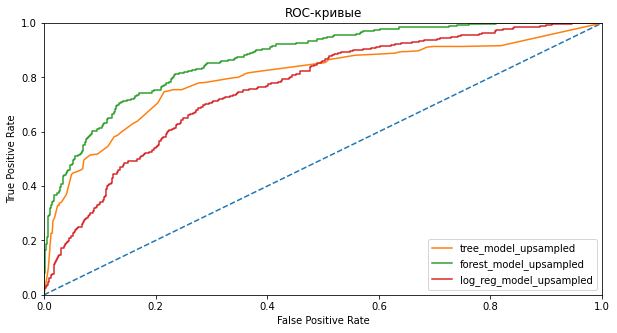

In [121]:
# Построим график ROC-кривых трех моделей
plt.figure(figsize=(10, 5)) 
plt.title('ROC-кривые')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

probabilities = [tree_prob_upsampled_one, for_prob_upsampled_one, log_prob_upsampled_one]
labels = ['tree_model_upsampled', 'forest_model_upsampled', 'log_reg_model_upsampled']

for i in range(len(probabilities)):
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities[i])
    plt.plot(fpr, tpr, label = labels[i])
    plt.legend()

plt.show()

In [122]:
# Построим таблицу значений F1-меры моделей c дисбалансом,
# сбалансированных и с увеличенными выборками 
models_upsampled = pd.DataFrame(index = ['tree_model', 'forest_model', 'log_reg_model'], 
                                data = [best_tree_result_upsampled, best_for_result_upsampled, best_log_result_upsampled],
                                columns = ['upsampled'])
models_balanced = models_balanced.join(models_upsampled)

In [123]:
models_balanced

,unbalanced,balanced,upsampled
tree_model,0.560531,0.572012,0.570552
forest_model,0.593220,0.621083,0.628641
log_reg_model,0.282828,0.495694,0.493874


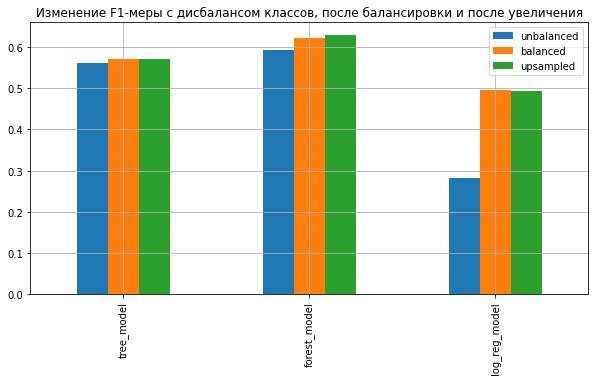

In [124]:
# Построим график по этой таблице 
models_balanced.plot(kind = 'bar',
                    grid = True,
                    figsize = (10,5),
                    title='Изменение F1-меры c дисбалансом классов, после балансировки и после увеличения');

Увеличение выборки техникой `upsampling` не улучшило качество моделей по сравнению со взевшиванием классов. 

### Уменьшение выборки

In [125]:
# Уменьшим количество объектов нулевого класса техникой downsampling
def downsample(feat, targ, fraction):
    feat_zeros = feat[targ.values == 0]
    feat_ones = feat[targ.values == 1]
    targ_zeros = targ[targ.values == 0]
    targ_ones = targ[targ.values == 1]
    
    features_downsampled =\
    pd.concat([feat_zeros.sample(frac = fraction, random_state=12345)] + [feat_ones])
    target_downsampled =\
    pd.concat([targ_zeros.sample(frac = fraction, random_state = 12345)] + [targ_ones])
    
    features_downsampled, target_downsampled =\
    shuffle(features_downsampled, target_downsampled, random_state = 12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.2)

In [126]:
# Посмотрим на новое соотношение классов в целевом признаке 
target_downsampled.value_counts(normalize = True)

1    0.561616
0    0.438384
Name: exited, dtype: float64

Обучим модели на новых данных

#### Модель решающего дерева

In [127]:
%time

best_tree_model_downsampled = None
best_tree_result_downsampled = 0
best_tree_depth_downsampled = 0
best_tree_split_downsampled = 0
best_tree_criterion_downsampled = None

for depth in range(1, 10):
    for split in range(2, 10):
        for criterion in ['gini', 'entropy']:
            tree_model_downsampled = DecisionTreeClassifier(random_state = 12345,
                                            max_depth = depth,
                                            min_samples_split = split,
                                            criterion = criterion)
            tree_model_downsampled.fit(features_downsampled, target_downsampled)
            tree_predictions_downsampled = tree_model_downsampled.predict(features_valid)
            tree_result_downsampled = f1_score(target_valid, tree_predictions_downsampled)
            
            if tree_result_downsampled > best_tree_result_downsampled:
                best_tree_model_downsampled = tree_model_downsampled
                best_tree_result_downsampled = tree_result_downsampled
                best_tree_depth_downsampled = depth
                best_tree_split_downsampled = split
                best_tree_criterion_downsampled = criterion

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [128]:
best_tree_result_downsampled

0.5464684014869888

In [129]:
tree_prob_downsampled = best_tree_model_downsampled.predict_proba(features_valid)
tree_prob_downsampled_one = tree_prob_downsampled[:,1]
tree_downsampled_auc_roc = roc_auc_score(target_valid, tree_prob_downsampled_one)

In [130]:
tree_downsampled_auc_roc

0.826104571778771

#### Модель случайного леса

In [131]:
%time

best_for_model_downsampled = None
best_for_result_downsampled = 0
best_for_depth_downsampled = 0
best_for_split_downsampled = 0
best_est_downsampled = 0 

for depth in range(1, 15):
    for split in range(2, 15):
        for est in range(30, 300, 10):
            for_model_downsampled = RandomForestClassifier(random_state = 12345,
                                                           max_depth = depth,
                                                           min_samples_split = split,
                                                           n_estimators = est)
            for_model_downsampled.fit(features_downsampled, target_downsampled)
            for_predictions_downsampled = for_model_downsampled.predict(features_valid)
            for_result_downsampled = f1_score(target_valid, for_predictions_downsampled)
            
            if for_result_downsampled > best_for_result_downsampled:
                best_for_model_downsampled = for_model_downsampled
                best_for_result_downsampled = for_result_downsampled
                best_for_depth_downsampled = depth
                best_for_split_downsampled = split
                best_est_downsampled = est 

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [132]:
best_for_result_downsampled

0.5750736015701668

In [133]:
for_prob_downsampled = best_for_model_downsampled.predict_proba(features_valid)
for_prob_downsampled_one = for_prob_downsampled[:,1]
for_downsampled_auc_roc = roc_auc_score(target_valid, for_prob_downsampled_one)

In [134]:
for_downsampled_auc_roc

0.8562394171787713

#### Модель логистической регрессии

In [135]:
%time

best_log_model_downsampled = None
best_log_result_downsampled = 0
best_it_downsampled = 0
best_c_downsampled = 0

for it in range(100, 500, 10):
    for c in np.arange(1.0, 5.0):
        log_model_downsampled = LogisticRegression(random_state = 12345,
                                                   solver='liblinear',
                                                   max_iter = it,
                                                   C = c)
        log_model_downsampled.fit(features_downsampled, target_downsampled)
        log_predictions_downsampled = log_model_downsampled.predict(features_valid)
        log_result_downsampled = f1_score(target_valid, log_predictions_downsampled)
        
        if log_result_downsampled > best_log_result_downsampled:
            best_log_model_downsampled = log_model_downsampled
            best_log_result_downsampled = log_result_downsampled
            best_it_downsampled = it
            best_c_downsampled = c

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [136]:
best_log_result_downsampled

0.4702928870292887

In [137]:
log_prob_downsampled = log_model_downsampled.predict_proba(features_valid)
log_prob_downsampled_one = log_prob_downsampled[:,1]
log_downsampled_auc_roc = roc_auc_score(target_valid, log_prob_downsampled_one)

In [138]:
log_downsampled_auc_roc

0.7614471431738126

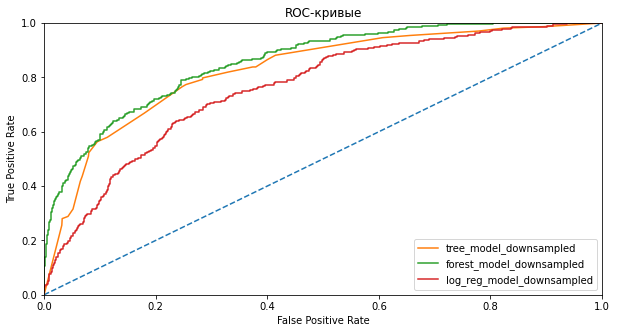

In [139]:
# Построим график ROC-кривых трех моделей
plt.figure(figsize=(10, 5)) 
plt.title('ROC-кривые')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

probabilities = [tree_prob_downsampled_one, for_prob_downsampled_one, log_prob_downsampled_one]
labels = ['tree_model_downsampled', 'forest_model_downsampled', 'log_reg_model_downsampled']

for i in range(len(probabilities)):
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities[i])
    plt.plot(fpr, tpr, label = labels[i])
    plt.legend()

plt.show()

Уменьшение выборки оказалось наименее эффективным в борьбе с дисбалансом классов для всех моделей. По-видимому данных для анализа осталось слишком мало.

In [140]:
# Построим таблицу значений F1-меры моделей c дисбалансом, 
# сбалансированных, с увеличенными и с уменьшенными  выборками 
models_downsampled = pd.DataFrame(index = ['tree_model', 'forest_model', 'log_reg_model'], 
                                data = [best_tree_result_downsampled, best_for_result_downsampled, best_log_result_downsampled],
                                columns = ['downsampled'])
models_balanced = models_balanced.join(models_downsampled)

In [141]:
models_balanced

,unbalanced,balanced,upsampled,downsampled
tree_model,0.560531,0.572012,0.570552,0.546468
forest_model,0.593220,0.621083,0.628641,0.575074
log_reg_model,0.282828,0.495694,0.493874,0.470293


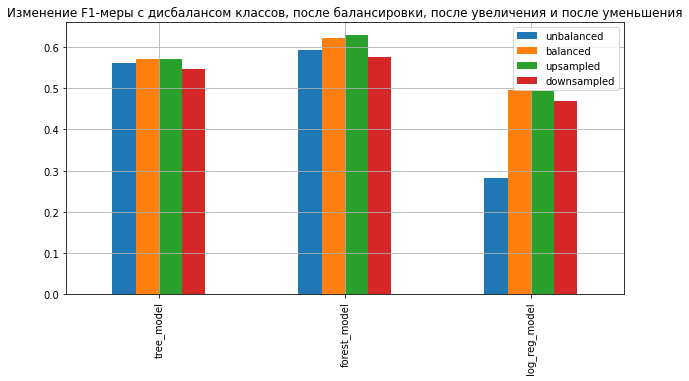

In [142]:
# Построим новый график 
models_balanced.plot(kind = 'bar',
                    grid = True,
                    figsize = (10,5),
                    title='Изменение F1-меры c дисбалансом классов, после балансировки, после увеличения и после уменьшения');

**Вывод:**

В борьбе с дисбалансом классов победило взвешивание классов с помощью аргумента `class_weight = 'balanced'`. С ним модель случайного леса показала наилучший результат. 

Метод `upsampling` также повысил качество всех моделей. 

А уменьшение выборки методом `downsampling` не улучшило результат. Видимо, в уменьшенной выборке данных просто не хватает для эффективного анализа.

## Тестирование модели

In [143]:
# Протестируем лучшую модель на тестовой выборке
for_test = for_model_balanced.predict(features_test)
for_result_test = f1_score(target_test, for_test)

In [144]:
for_result_test

0.6416107382550335

In [145]:
# Посчитаем метрику auc_roc на тестовой выборке
for_prob_test = for_model_balanced.predict_proba(features_test)
for_prob_test_one = for_prob_test[:,1]
for_test_auc_roc = roc_auc_score(target_test, for_prob_test_one)

In [146]:
for_test_auc_roc

0.8569734627928103

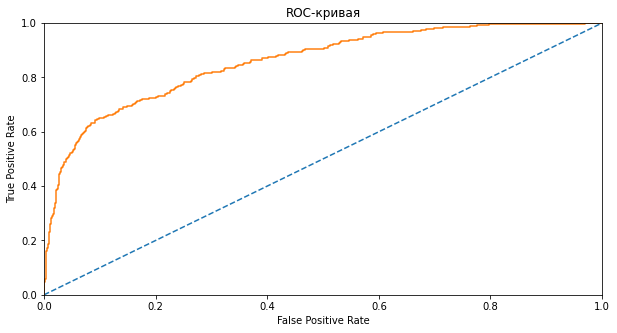

In [147]:
# Построим ROC-кривую лучшей модели 
plt.figure(figsize = (10, 5)) 
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr, tpr, thresholds = roc_curve(target_test, for_prob_test_one)
plt.plot(fpr, tpr)

plt.show()

На тестовой выборке модель случайного леса с гиперпараметрами:

`max_depth` = **9**

`min_samples_split` = **11**

`n_estimators` = **40**

`class_weight` = **'balanced'**

показала значение метрики `F1 мера` **0.64**, что выше установленного критерия успешной модели.

Значение метрики `AUC_ROC` на тестовой выборке составило **0.86**.

## Общий вывод

В данном проекте мы строили и выбирали лучшую модель, прогнозирующую возможный уход клиентов из «Бета-Банка». 

В качестве критерия успешности модели использовали значение метрики `F1-мера` не менее **0.59** на тестовой выборке.

Мы изучили данные, определили, какой столбец будет целевым признаком, установили, что данные в нем относятся к категориальным.

Обнаружили пропуски в столбце `tenure` и удалили строки с пропущенными значениями.

Мы удалили столбцы с признаками, которые не влияют на целевой: `row_number`,`customer_id`,`surname`.

Разделили данные на обучающую, валидационную и тестовую выборки в соотношении 60:20:20.

Закодировали категориальные признаки с помощью One-Hot Encoder.

Стандартизировали численные признаки с помощью StandardScaler.

Мы изучали три модели и выбирали лучшую по метрике `F1-мера`:

- модель **решающего дерева** со значениями максимальной глубины от 1 до 10, минимальным количеством примеров для разделения от 2 до 10 и критериями `gini` и `entropy`.
 
- модель **случайного леса** со значениями максимальной глубины от 1 до 15, минимальным количеством примеров для разделения от 2 до 15 и количеством деревьев от 10 до 300 с шагом 10.

- модель **логистической регрессии** с количество итераций от 100 до 500 и гиперпараметром `C` от 1.0 до 5.0.

Мы также измеряли значение метрики `AUC_ROC` и строили `ROC - кривые` трех моделей.

Лучший результат на валидационной выборке среди моделей обученных *без учета дисбаланса классов* со значением метрики `F1-мера` **0.59** и `AUC_ROC` **0.855** показала модель **случайный лес** с `max_depth` - **12**, `min_samples_split` - **8** и количеством деревьев **30**. 

Модель **логистической регрессии**  по метрике `F1-мера` показала худший результат - всего **0.29**, а по метрике `AUC_ROC` -  **0.758**.

Для повышения качества моделей мы исследовали баланс классов и выявили, что объектов отрицательного класса почти в четыре раза больше, чем положительного.

Для устранения дисбаланса мы применили три способа, заново перебрав те же гиперпараметры трех моелей:

1. Взвешивание классов

   Мы добавили в модели аргумент `class_weight` = **'balanced'** .

   Взвешивание классов повысило качество  всех моделей. 

   Значение `F1-меры` модели **случайного леса** c `max_depth` - **9**, `min_samples_split` -      **11** и количеством деревьев **40** на валидационной выборке выросло до **0.628**, что выше    установленного критерия успешной модели. `AUC_ROC` данной модели составила **0.86**.
   

2. Увеличение выборки (`upsampling`)

   Увеличение выборки техникой `upsampling` улучшило качество моделей по сравнению с      дисбалансированными, но уступило взевшиванию классов.


3. Уменьшение выборки (`downsampling`)

   Уменьшение выборки техникой `downsampling` оказалось наименее эффективным в борьбе с   дисбалансом классов для всех моделей. По-видимому данных для анализа в уменьшенной выборке слишком мало.

Мы протестировали лучшую модель **случайного леса** с гиперпараметрами:

`max_depth` = **9**

`min_samples_split` = **11**

`n_estimators` = **40**

`class_weight` = **'balanced'**

Значение метрики `F1 мера` на тестовой выборке составило **0.64**, что выше установленного критерия успешной модели.

Значение метрики `AUC_ROC` на тестовой выборке составило **0.86**.